In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load datasets
data = pd.read_csv("Datasets/drug200 - Copy.csv")

In [3]:
df = data.copy()

In [4]:
# df = data.sample(300, random_state=42).reset_index(drop=True)

In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          498 non-null    int64  
 1   Sex          498 non-null    object 
 2   BP           498 non-null    object 
 3   Cholesterol  498 non-null    object 
 4   Na_to_K      498 non-null    float64
 5   Drug         498 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 23.5+ KB


In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df.shape

(498, 6)

In [9]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [10]:
df.dropna()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355000,DrugY
1,47,M,LOW,HIGH,13.093000,drugC
2,47,M,LOW,HIGH,10.114000,drugC
3,28,F,NORMAL,HIGH,7.798000,drugX
4,61,F,LOW,HIGH,18.043000,DrugY
...,...,...,...,...,...,...
493,25,M,NORMAL,NORMAL,18.554318,drugB
494,45,F,LOW,NORMAL,14.028384,drugB
495,23,M,LOW,NORMAL,13.967943,drugX
496,37,F,NORMAL,HIGH,27.496105,DrugY


In [11]:
df.duplicated().sum()

0

In [12]:
numerical_feature = df.columns[data.dtypes != 'object']
categorical_feature = df.columns[data.dtypes == 'object']

In [13]:
numerical_feature

Index(['Age', 'Na_to_K'], dtype='object')

In [14]:
categorical_feature

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [15]:
df['Sex'].value_counts()

Sex
M    258
F    240
Name: count, dtype: int64

In [16]:
df['BP'].value_counts()

BP
HIGH      188
LOW       166
NORMAL    144
Name: count, dtype: int64

In [17]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      256
NORMAL    242
Name: count, dtype: int64

In [18]:
df['Drug'].value_counts()

Drug
DrugY    151
drugX    119
drugA     81
drugB     76
drugC     71
Name: count, dtype: int64

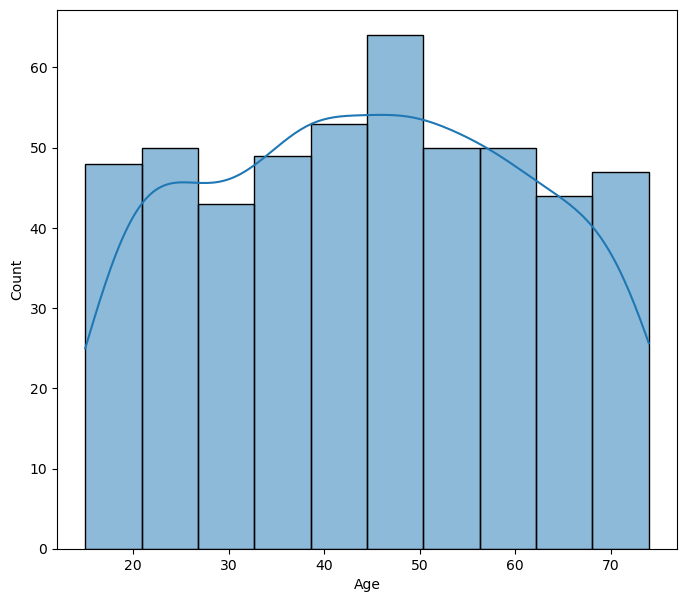

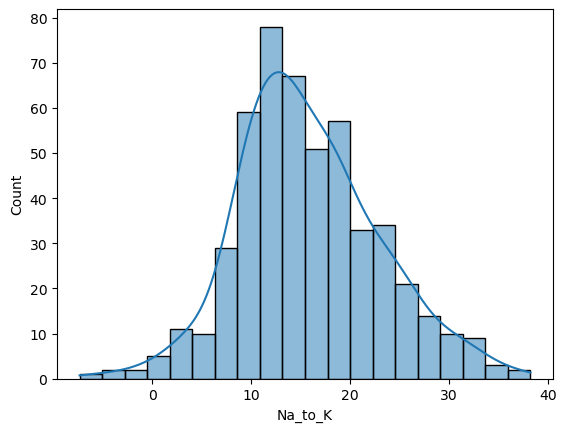

In [19]:
plt.figure(figsize=(8,7))
x= 0
for i in numerical_feature:
    sns.histplot(data=df,x=i,kde=True)
    plt.show()

<Axes: ylabel='Na_to_K'>

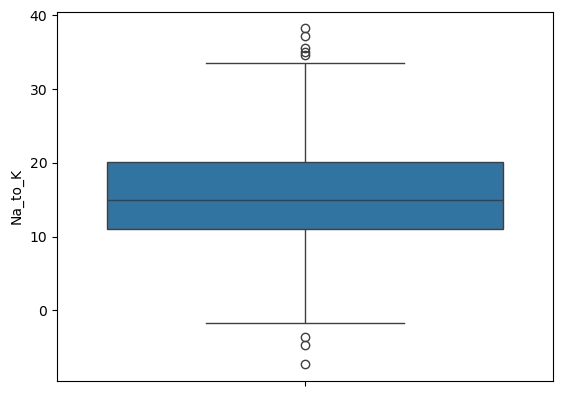

In [20]:
sns.boxplot(df['Na_to_K'])

In [21]:
IQR = df.Na_to_K.quantile(0.75) -  df.Na_to_K.quantile(0.25)

In [22]:
IQR

9.16000535

In [23]:
upper_bound = df['Na_to_K'].quantile(0.75) + IQR*3

In [24]:
upper_bound

47.656935425

In [25]:
df = df[~(df['Na_to_K']>=30)]

<Axes: ylabel='Na_to_K'>

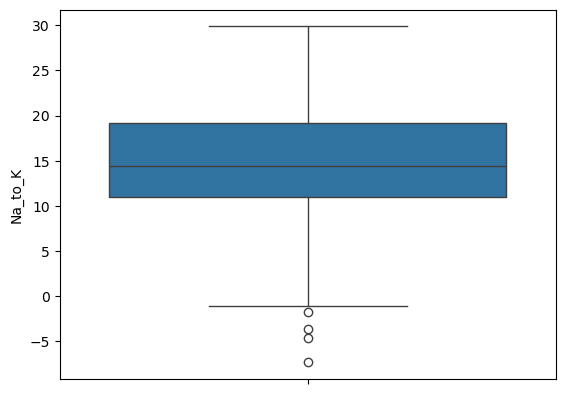

In [26]:
sns.boxplot(df['Na_to_K'])

<Axes: >

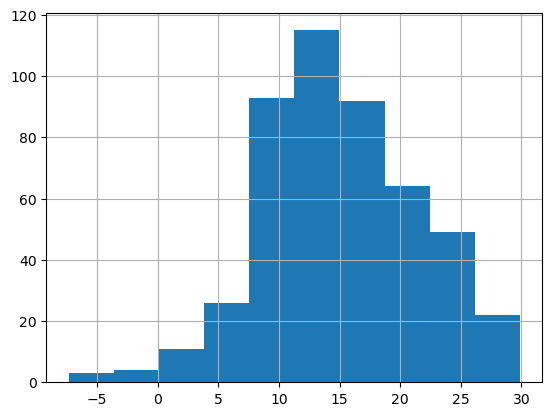

In [27]:
df['Na_to_K'].hist()

In [28]:
categorical_feature

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [29]:
df['Sex'].value_counts()

Sex
M    249
F    230
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

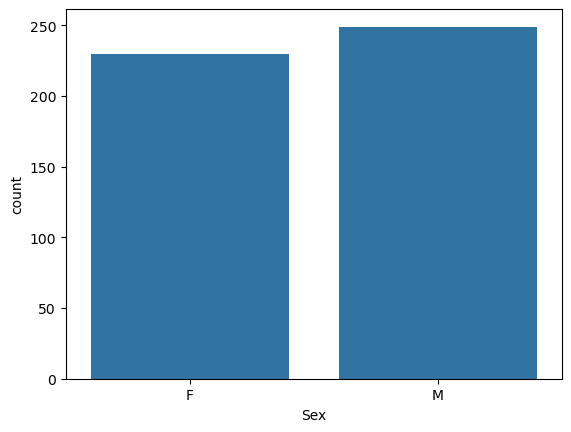

In [30]:
sns.countplot(x = df['Sex'])

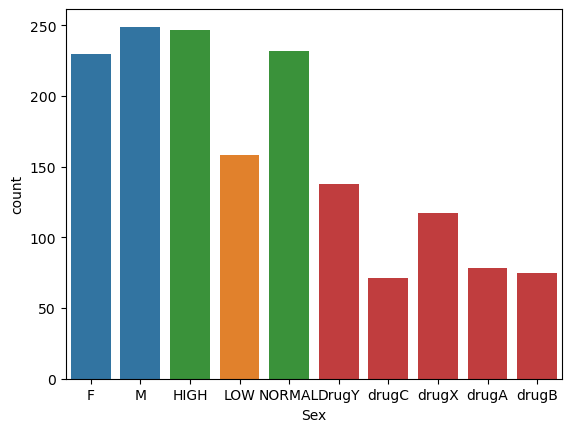

In [31]:
for fea in categorical_feature:
    sns.countplot(x = df[fea])

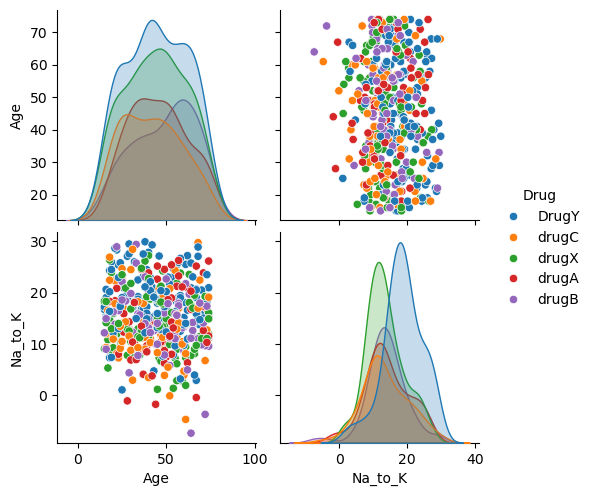

In [32]:
sns.pairplot(df, hue= 'Drug',vars = numerical_feature)

In [33]:
df.to_csv("Datasets/cleandata_highValue.csv",index=False)